In [2]:
import nibabel as nb
import nilearn
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import json
import glob
import pandas as pd
import plotly.express as px
import cortex
import sys
import os
import importlib
import plotly.graph_objects as go

# nilearn import
from nilearn.glm.first_level import FirstLevelModel
from nilearn.glm import fdr_threshold
from nilearn.plotting import plot_design_matrix 
from nilearn.glm.first_level import make_first_level_design_matrix,run_glm
from nilearn.glm.contrasts import compute_contrast
import scipy.stats as stats
from nilearn.interfaces.fmriprep import load_confounds


import warnings
warnings.filterwarnings("ignore")


# Personal imports
sys.path.append("{}/../../../utils".format(os.getcwd()))
from glm_utils import eventsMatrix, extract_predictions_r2
from surface_utils import load_surface, make_surface_image
from pycortex_utils import draw_cortex, set_pycortex_config_file,load_surface_pycortex

In [3]:
main_dir = '/Users/uriel/disks/meso_shared'
code_dir = '/Users/uriel/disks/meso_H/projects'
project_dir = 'RetinoMaps'
subject = 'sub-01'
group = '327'

In [9]:
results = load_surface_pycortex(L_fn='/Users/uriel/disks/meso_shared/RetinoMaps/derivatives/pp_data/sub-01/fsnative/final_stats/sub-01_hemi-L_final-stats.func.gii', R_fn='/Users/uriel/disks/meso_shared/RetinoMaps/derivatives/pp_data/sub-01/fsnative/final_stats/sub-01_hemi-R_final-stats.func.gii')
final_map = results['data_concat']


all_idx, pursuit_idx, saccade_idx, pursuit_and_saccade_idx, vision_idx, vision_and_pursuite_idx, vision_and_saccade_idx, vision_and_pursuite_and_pursuit_idx = 0,1,2,3,4,5,6,7


In [4]:


param_final = {'subject':'sub-170k','xfmname':None,'data': final_map[all_idx,:], 'cmap': 'stats_colors', 'alpha': final_map[0,:], 
             'vmin': 0, 'vmax': 7, 'cbar': 'stats', 'cmap_steps': 255,
             'cortex_type': 'VertexRGB','description': 'final map',
             'curv_brightness': 0.1, 'curv_contrast': 0.25, 'add_roi': False,
             'cbar_label': '', 'with_labels': True}



draw_cortex(**param_final)


NameError: name 'final_map' is not defined

Fontconfig warning: ignoring UTF-8: not a valid region tag


<RGB vertex data for (sub-01)>

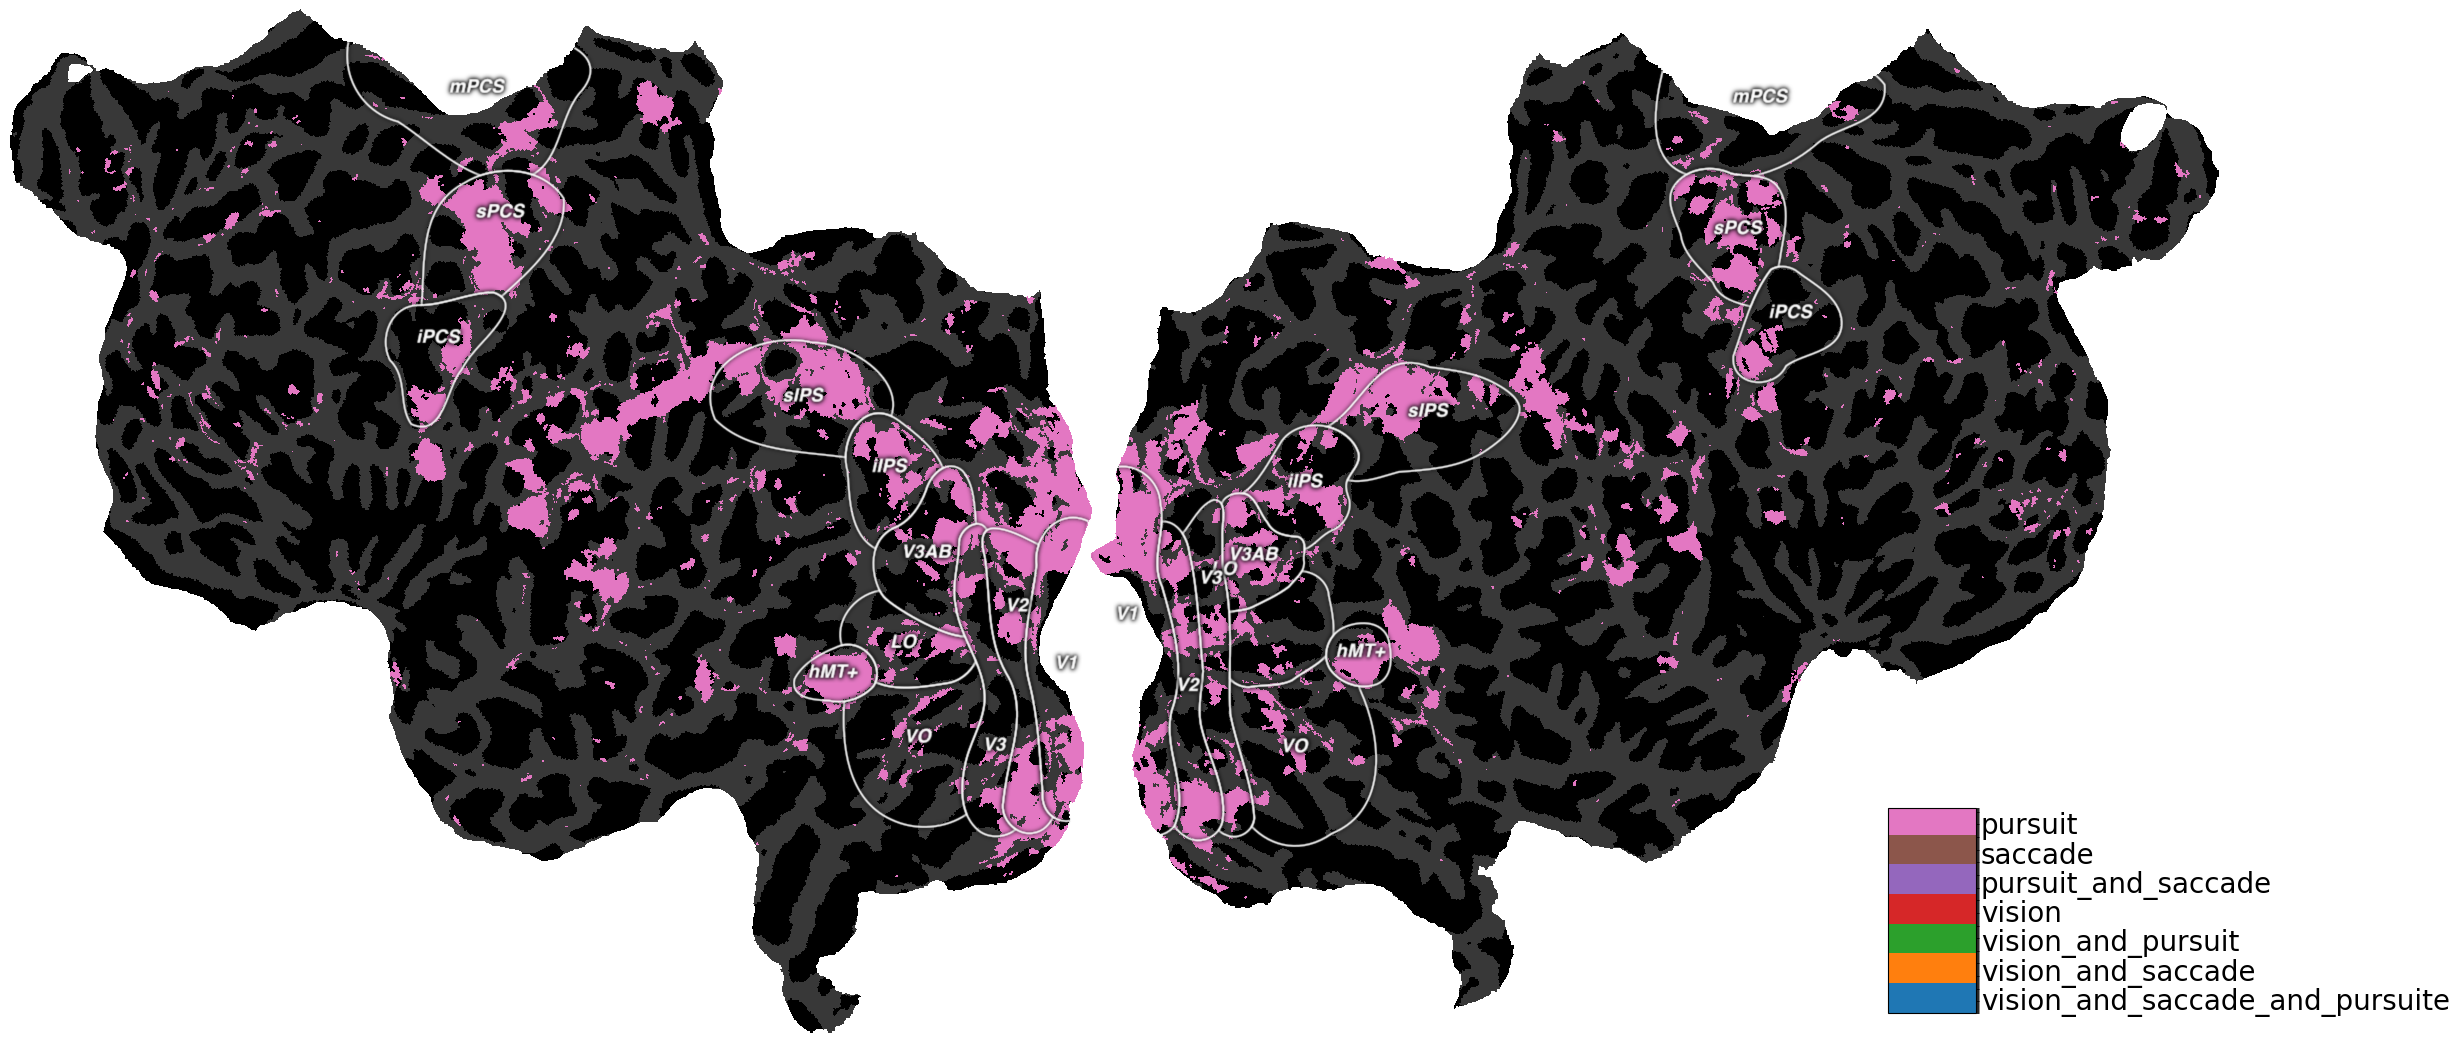

In [16]:
param_final = {'subject':subject,'xfmname':None,'data': final_map[pursuit_idx,:], 'cmap': 'stats_colors', 'alpha': final_map[pursuit_idx,:], 
             'vmin': 0, 'vmax': 7, 'cbar': 'stats', 'cmap_steps': 255,
             'cortex_type': 'VertexRGB','description': 'final map',
             'curv_brightness': 0.1, 'curv_contrast': 0.25, 'add_roi': False,
             'cbar_label': '', 'with_labels': True}



draw_cortex(**param_final)



Fontconfig warning: ignoring UTF-8: not a valid region tag


<RGB vertex data for (sub-01)>

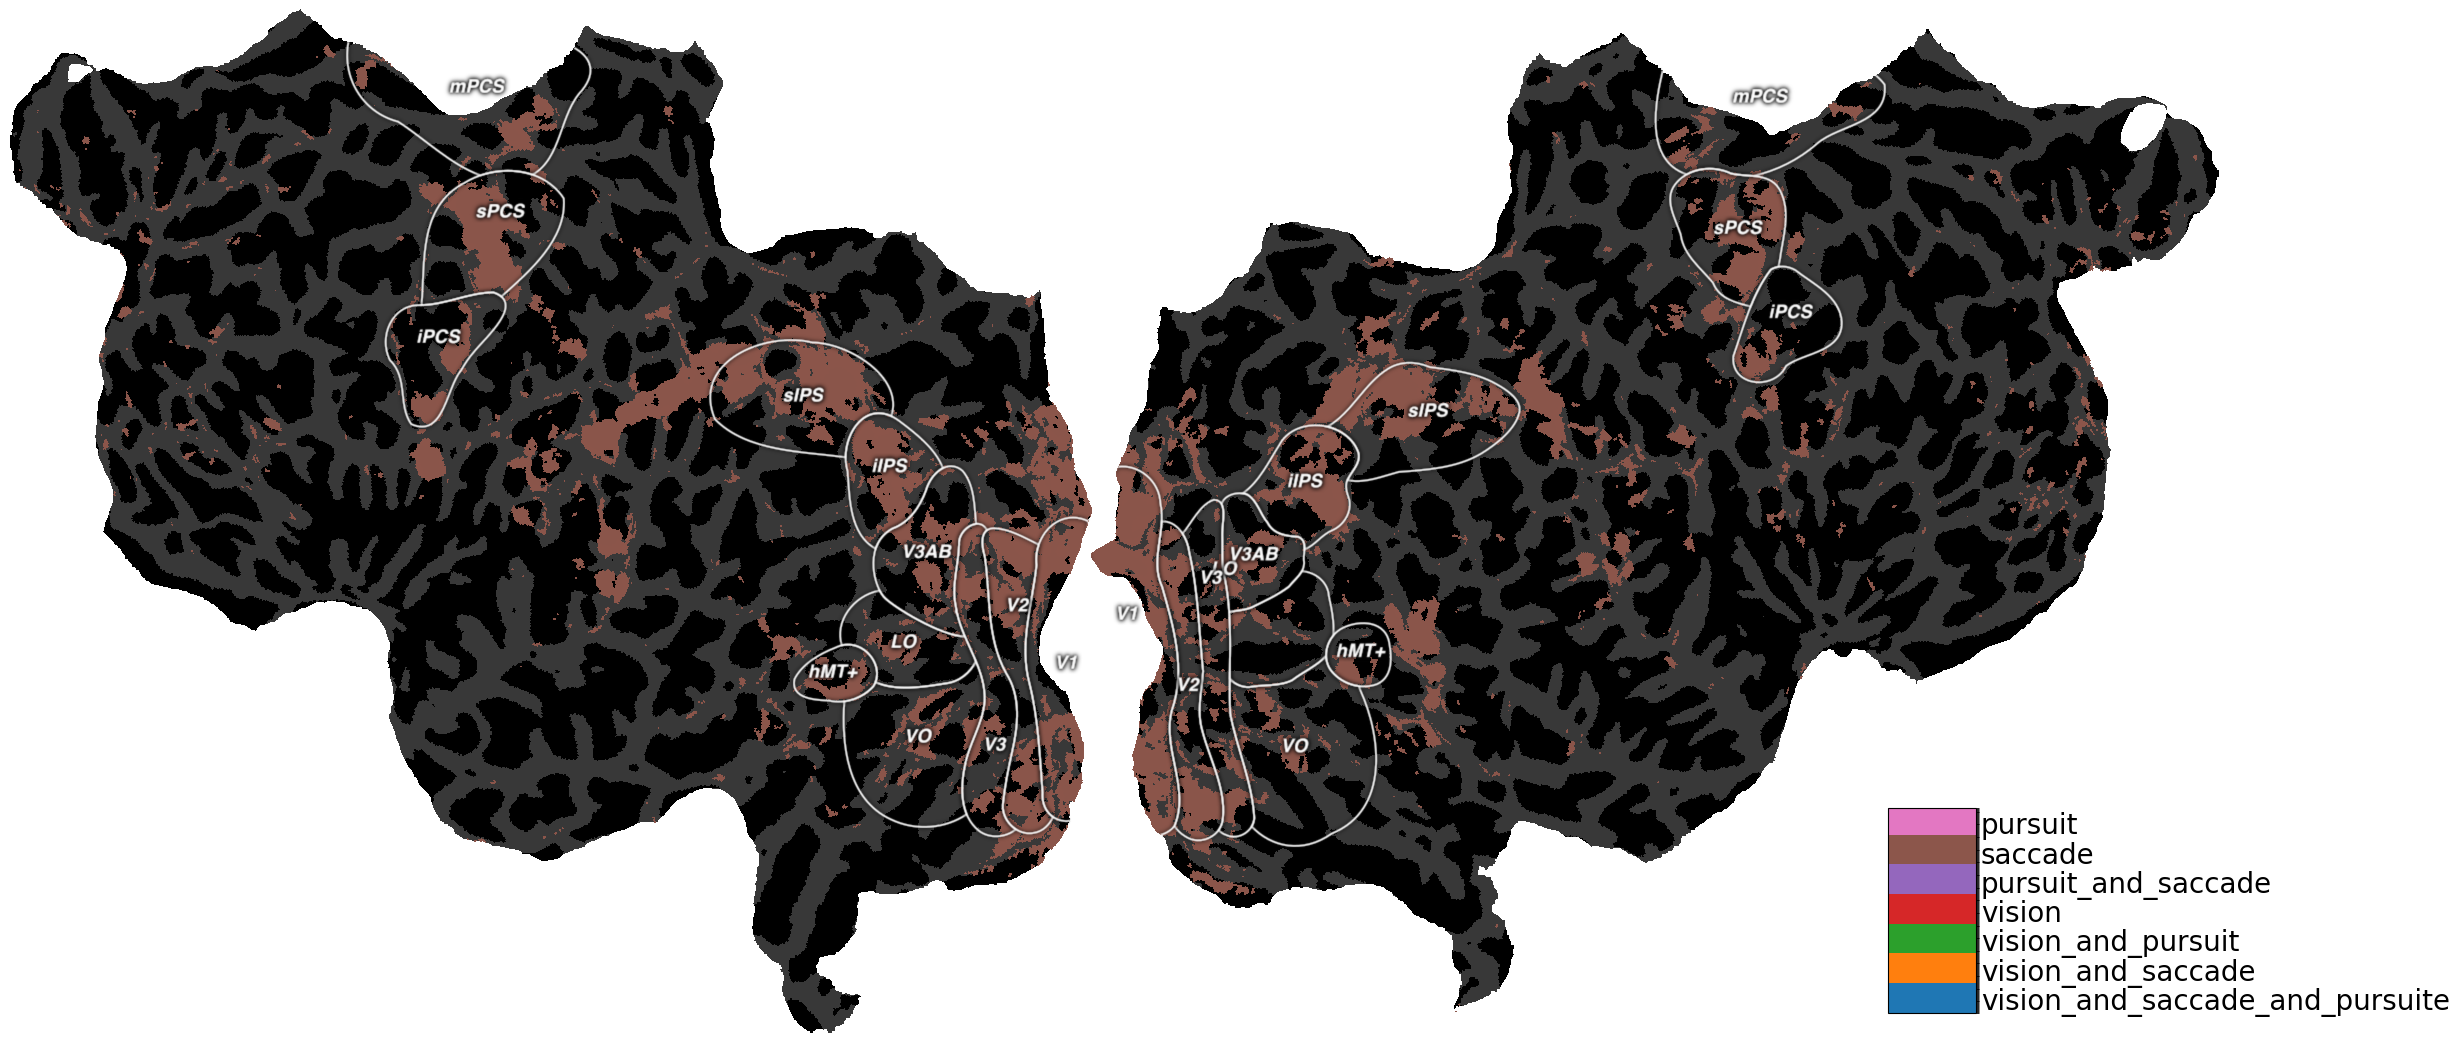

In [17]:
param_final = {'subject':subject,'xfmname':None,'data': final_map[saccade_idx,:], 'cmap': 'stats_colors', 'alpha': final_map[saccade_idx,:], 
             'vmin': 0, 'vmax': 7, 'cbar': 'stats', 'cmap_steps': 255,
             'cortex_type': 'VertexRGB','description': 'final map',
             'curv_brightness': 0.1, 'curv_contrast': 0.25, 'add_roi': False,
             'cbar_label': '', 'with_labels': True}



draw_cortex(**param_final)

In [15]:
import matplotlib.colors as colors
val = np.linspace(0, 1, 255 + 1, endpoint=False)


val = val[val > 0.13]

colmap = colors.LinearSegmentedColormap.from_list('my_colmap', base(val), N=len(val))

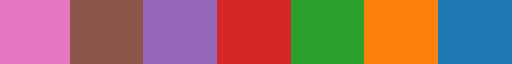

In [16]:
colmap

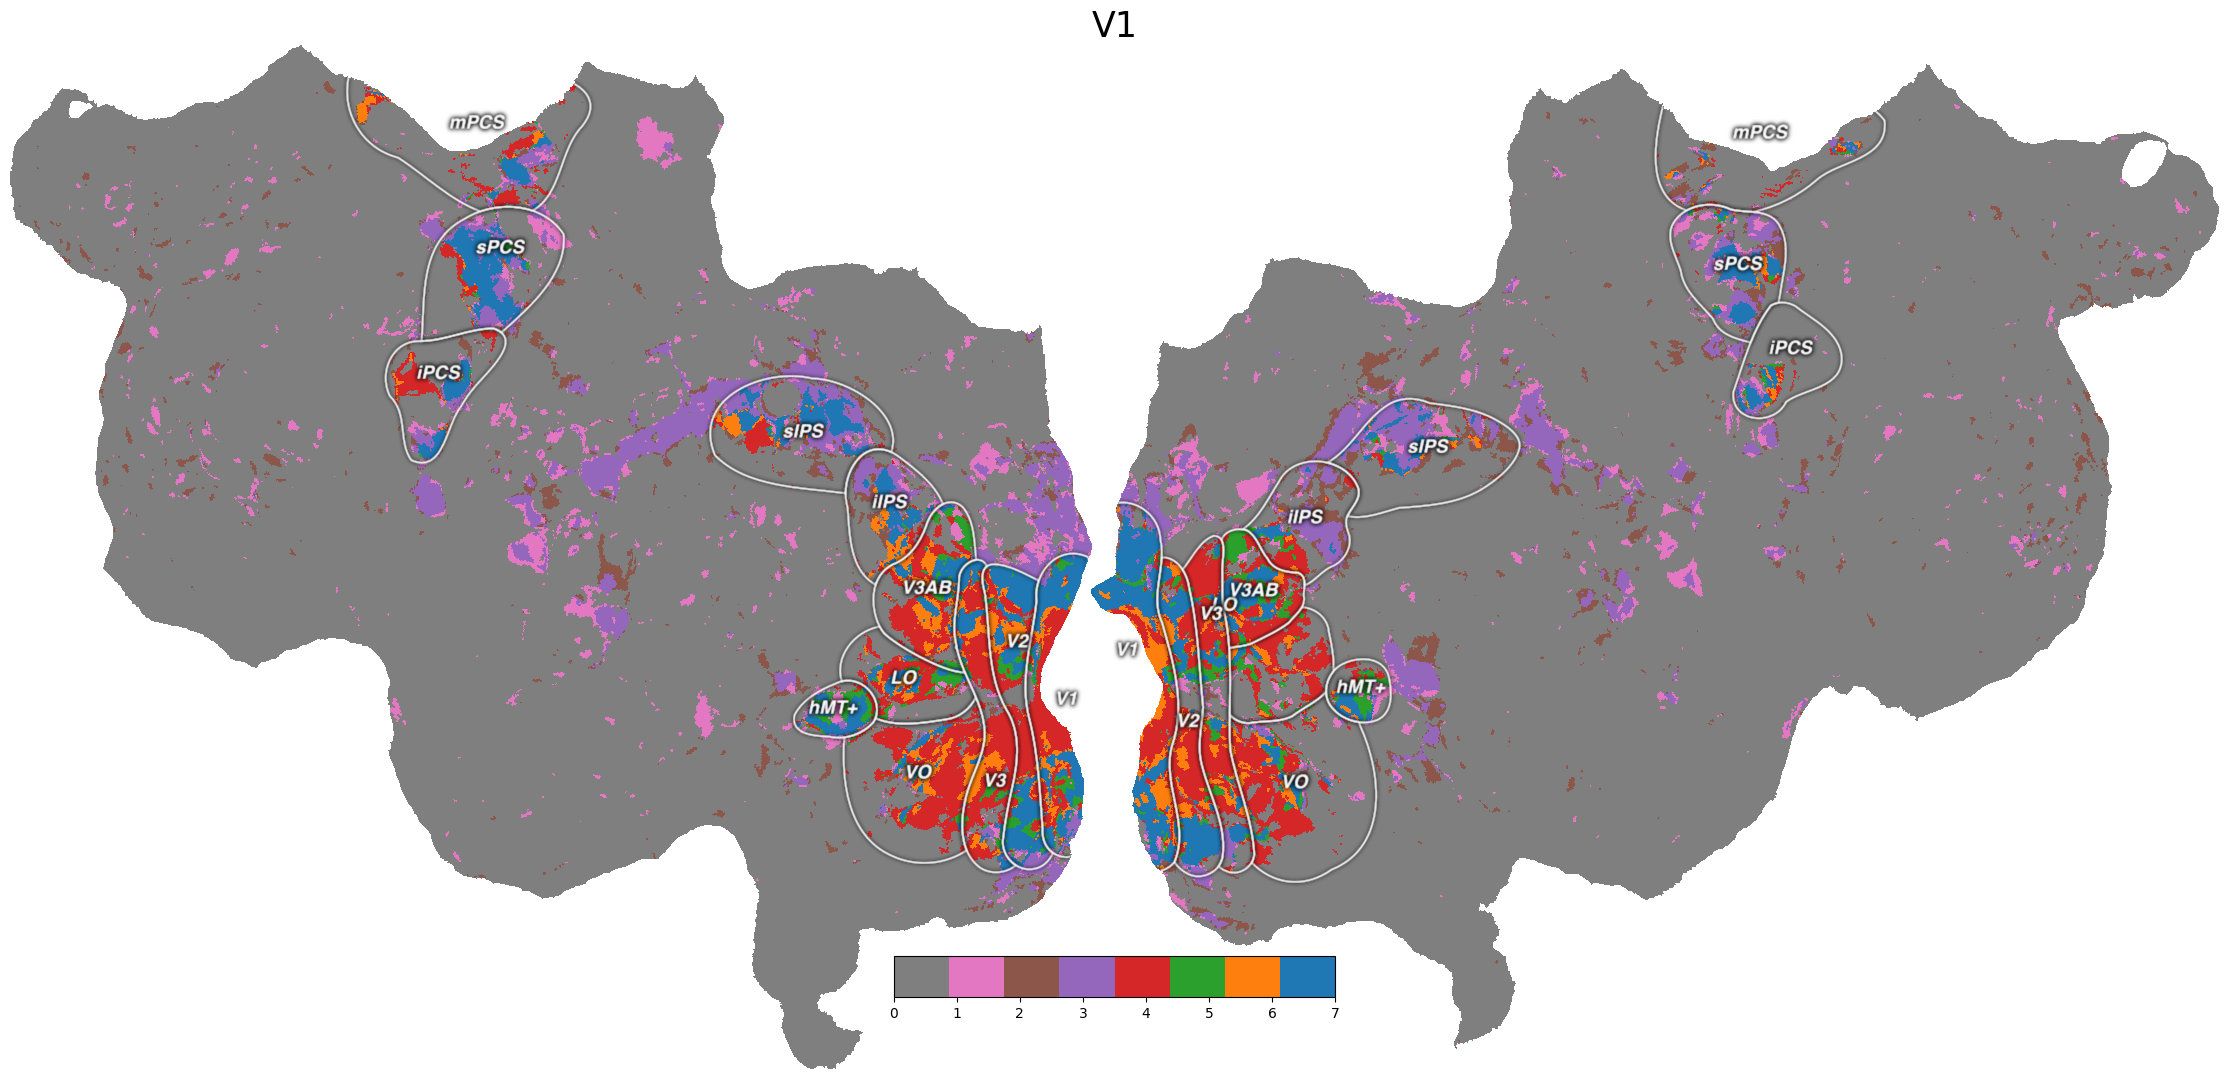

In [9]:
vertex_data = cortex.Vertex(final_map[0,:], subject, cmap='stats_colors')

cortex.quickshow(vertex_data)
plt.title("V1",fontsize=25)
# plt.savefig('/Users/uriel/Downloads/V1.pdf')
plt.show()

In [13]:
stat_sacc = load_surface('/Users/uriel/disks/meso_shared/RetinoMaps/derivatives/pp_data/sub-01/fsnative/glm/stats/sub-01_task-SacLoc_hemi-R_fmriprep_dct_loo-avg_glm-stats.func.gii')
stat_pur = load_surface('/Users/uriel/disks/meso_shared/RetinoMaps/derivatives/pp_data/sub-01/fsnative/glm/stats/sub-01_task-PurLoc_hemi-R_fmriprep_dct_loo-avg_glm-stats.func.gii')


In [10]:
fit_sacc = load_surface('/Users/uriel/disks/meso_shared/RetinoMaps/derivatives/pp_data/sub-01/fsnative/glm/glm_fit/sub-01_task-PurLoc_hemi-L_fmriprep_dct_avg_loo-1_glm-pred.func.gii')
fit_pur = load_surface('/Users/uriel/disks/meso_shared/RetinoMaps/derivatives/pp_data/sub-01/fsnative/glm/glm_fit/sub-01_task-SacLoc_hemi-L_fmriprep_dct_avg_loo-1_glm-pred.func.gii')


In [19]:
qw = stat_sacc[1]

a = np.sum(qw, axis = 0)

In [23]:
a.shape

(230015,)

In [12]:
stat_pur

(<nibabel.gifti.gifti.GiftiImage at 0x315bb7d90>,
 array([[-0.36400345, -0.47156203, -0.448429  , ..., -0.12224234,
         -0.13714983, -0.19208977],
        [-0.36400345, -0.47156203, -0.448429  , ..., -0.12224234,
         -0.13714983, -0.19208977],
        [-0.36400345, -0.47156203, -0.448429  , ..., -0.12224234,
         -0.13714983, -0.19208977],
        ...,
        [-0.42262807, -0.5475061 , -0.52065134, ..., -0.14193001,
         -0.15924159, -0.22302693],
        [-0.40949652, -0.5304951 , -0.504474  , ..., -0.1375201 ,
         -0.15429316, -0.2160972 ],
        [-0.39759812, -0.5150815 , -0.4898158 , ..., -0.1335243 ,
         -0.14980945, -0.20981823]], dtype=float32))

NameError: name 'load_surface' is not defined